# Imports

In [1]:
# Required for autocnet imports
import os
os.environ['ISISROOT'] = '/usgs/cpkgs/anaconda3_linux/envs/isis3.9.0'

# Autocnet Imports
from autocnet.graph.network import NetworkCandidateGraph

# Helpful Python Modules
import matplotlib.pyplot as plt  #     plotting package
import numpy as np               #     numerical computing package

# Ingest Network

In [2]:
config_path = 'config.yml'

### If creating the database

In [3]:
# lis_path = "AS15_landingsite_apollolro.lis"
# cnet_path = "AS15_landingsite_apollolro_jig1.net"

# ncg = NetworkCandidateGraph.from_filelist(lis_path, config_path, clear_db=True)
# ncg.place_points_from_cnet(cnet_path) 

### If database exists

In [4]:
ncg = NetworkCandidateGraph();
ncg.config_from_file(config_path);
ncg.from_database();

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/sqlalchemy/orm/relationships.py:1917: SAWarning: Setting backref / back_populates on relationship Points.overlay to refer to viewonly relationship Overlay.points will be deprecated in SQLAlchemy 1.4, and will be disallowed in a future release.  viewonly relationships should not be mutated (this warning may be suppressed after 10 occurrences)
  (self, other),
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/sqlalchemy/orm/relationships.py:1917: SAWarning: Setting backref / back_populates on relationship Overlay.points to refer to viewonly relationship Points.overlay will be deprecated in SQLAlchemy 1.4, and will be disallowed in a future release.  viewonly relationships should not be mutated (this warning may be suppressed after 10 occurrences)
  (self, other),


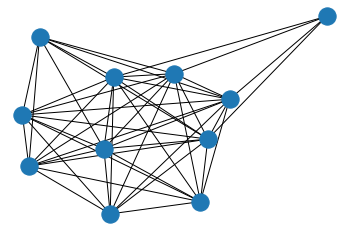

In [5]:
ncg.plot(); # check ncg is populated

# Check For Empty Overlaps

In [10]:
# read function documentation
ncg.empty_overlays?

In [6]:
overlays_wo_pts = ncg.empty_overlays(filters={}, size_threshold=0.1)
overlays_w_pts = ncg.connected_overlays(filters={}, size_threshold=0)

### Plot

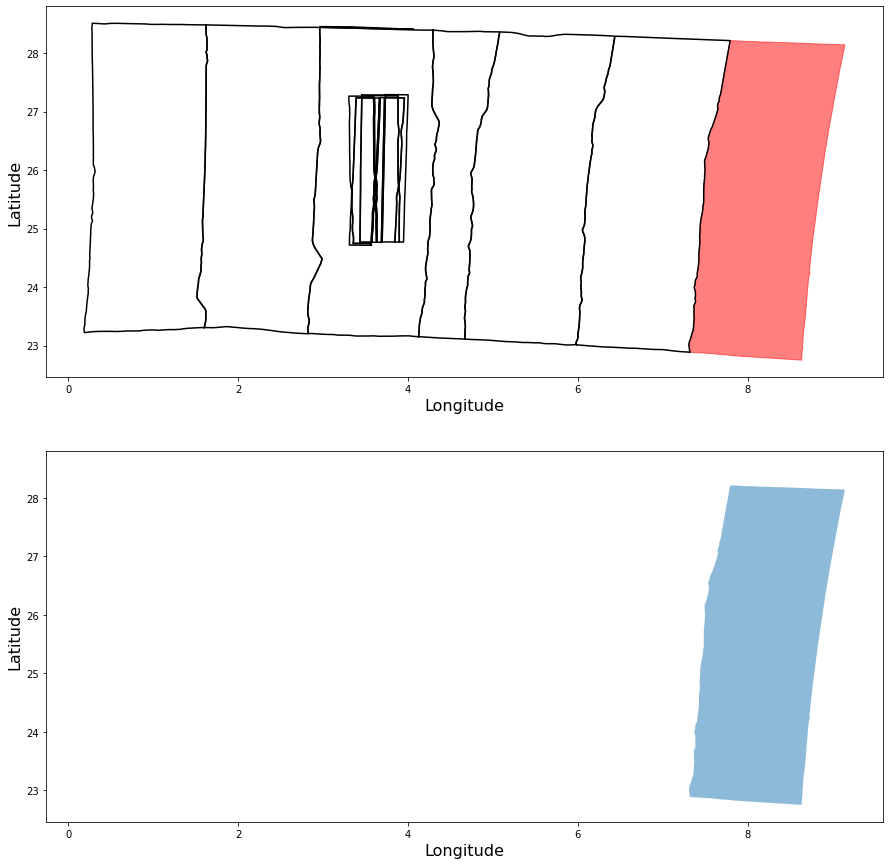

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(15, 15))

for o in overlays_w_pts:
    x, y = o.geom.envelope.exterior.xy
    axs[0].plot(*o.geom.exterior.xy, c='black')

for o in overlays_wo_pts:
    x, y = o.geom.envelope.exterior.xy
    axs[0].fill(*o.geom.exterior.xy, c='red', alpha=0.5)
    axs[1].fill(*o.geom.exterior.xy, alpha=0.5)
    
axs[0].set_xlabel('Longitude', size=16);
axs[0].set_ylabel('Latitude', size=16);
axs[1].set_xlabel('Longitude', size=16);
axs[1].set_ylabel('Latitude', size=16);
axs[1].set_xlim(axs[0].get_xlim());
axs[1].set_ylim(axs[0].get_ylim());